# **IMPORTS**

---

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
import os

In [166]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import linregress
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import sklearn

In [167]:
import sklearn, pandas, numpy, matplotlib, seaborn, xgboost

print(f"Scikit-learn: {sklearn.__version__}")
print(f"Pandas: {pandas.__version__}")
print(f"Numpy: {numpy.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Seaborn: {seaborn.__version__}")
print(f"XGBoost: {xgboost.__version__}")

Scikit-learn: 1.5.1
Pandas: 2.2.2
Numpy: 1.26.4
Matplotlib: 3.9.2
Seaborn: 0.13.2
XGBoost: 3.0.2


```
⠀⠀⠀⠀⠀⠀⣀⣤⡤
⠀⠀⠀⠀⢀⣾⣿⠋
⠀⠀⠀⣠⣾⣿⡟
⠀⠀⢸⠛⠉⢹⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⠄⠠⣀
⠀⠀⡘⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠖⠉⠀⠀⠀⣾⣿⣦⡀
⠀⠀⡇⠀⠀⠀⢡⠄⠀⠀⣀⣀⣀⣠⠊⠀⠀⠀⠀⡠⠞⠛⠛⠛⠛⡀
⠀⠀⢃⠀⠀⠀⠀⠗⠚⠉⠉⠀⠈⠁⠀⠀⠀⢀⡔⠁⠀
⠀⠀⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣶⣄⠲⡎
⠀⠀⠀⠃⠀⠀⢠⣤⡀⠀⠀⠀⠀⣿⣿⣿⠀⠘⡄
⠀⠀⠀⡆⠀⠀⣿⣿⡇⠀⠀⠀⠀⠈⠛⠉⣴⣆⢹⡄
⠀⠀⠀⣇⢰⡧⣉⡉⠀⠀⢀⡀⠀⣀⣀⣠⣿⡷⢠⡇
⠀⠀⠀⢻⠘⠃⠈⠻⢦⠞⠋⠙⠺⠋⠉⠉⠉⢡⠟
⠀⠀⠀⠀⠳⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠋⠀⠀
```

# **SETTINGS**
---

In [168]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

In [169]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

In [170]:
# Set the max displayable columns to max
pd.set_option('display.max_columns', None)

In [171]:
# Activates XLA (for JIT compiler)
os.environ["TF_XLA_FLAGS"]= "--tf_xla_enable_xla_devices"

# Uses the right memory when using GPU
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]= "true"

# **DATA**

---

In [172]:
# data path for loading
fd001_train_path= "../data/02_processed/FD001_train.csv"
fd001_test_path=  "../data/02_processed/FD001_test.csv"
fd001_rul_path=   "../data/02_processed/FD001_RUL.csv"

In [173]:
# loading the train dataset
FD001_train= pd.read_csv(fd001_train_path)
FD001_train.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189


In [174]:
# loading the test dataset
FD001_test= pd.read_csv(fd001_test_path)
FD001_test.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,192,191
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,192,190
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.5,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,192,189


In [175]:
# loading the rul for validation
FD001_rul = pd.read_csv(fd001_rul_path)
FD001_rul.head(3)

,true_rul
0,112
1,98
2,69


# **PREPARING THE DATA**

---

This should be done at previous notebook, but since we want to take advantage of models such as XGBR for handling outliers, we will do it here for comprehension in the process.

## Column drops

We saw before that there are some values that we don't actually need for our model. Let's drop them.

In [213]:
drop_cols= ["op_setting_1", "op_setting_2", "op_setting_3", "sensor_measure_1", "sensor_measure_5", 
            "sensor_measure_10", "sensor_measure_16", "sensor_measure_18", 
            "sensor_measure_19"]

In [207]:
FD001_train

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,1


> It is important to drop "cycle" and the unit id of each engine here to avoid data leakage.

In [263]:
X= FD001_train.drop(["unit", "RUL", "cycle", "max_cycle"] + drop_cols, axis=1)
y= FD001_train["RUL"]

In [264]:
X_train= FD001_train.drop(["unit", "RUL", "cycle", "max_cycle"] + drop_cols, axis=1)
y_train= FD001_train["RUL"]

In [265]:
X_test= FD001_test.drop(["unit", "RUL", "cycle", "max_cycle"] + drop_cols, axis=1)
y_test= FD001_test["RUL"]

## Normalization

In [266]:
# Knowing the sensors we want to normalize, we'll create a mask to apply to the data.

# We create a mask to apply RobustScaler to the data, the rest will be normalized with MinMaxScaler.
sensors_to_standardize= ["sensor_measure_2", "sensor_measure_3", "sensor_measure_4", 
                         "sensor_measure_7", "sensor_measure_8", "sensor_measure_9", 
                         "sensor_measure_11", "sensor_measure_12", "sensor_measure_13"]

In [268]:
preprocessor= ColumnTransformer(
  [
    ('sensors', MinMaxScaler(feature_range=(-1, 1)), sensors_to_standardize),
    ],
  remainder= "passthrough"
)

# **BASELINE MODELS**

---

In [269]:
def train_eval(model, name, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)

  # Model predictions
  y_pred_train= model.predict(X_train)
  y_pred_test=  model.predict(X_test)

  # Metrics on train
  mae_train=  mean_absolute_error(y_train, y_pred_train)
  rmse_train= root_mean_squared_error(y_train, y_pred_train)
  mse_train=  mean_squared_error(y_train, y_pred_train)
  r2_train=   r2_score(y_train, y_pred_train)

  # Metrics on test
  mae_test=  mean_absolute_error(y_test, y_pred_test)
  rmse_test= root_mean_squared_error(y_test, y_pred_test)
  mse_test=  mean_squared_error(y_test, y_pred_test)
  r2_test=   r2_score(y_test, y_pred_test)

  print(f"--- {name} TRAIN ---")
  print("MAE:",  mae_train)
  print("RMSE:", rmse_train)
  print("MSE:",  mse_train)
  print("R2:",   r2_train)

  print(f"\n--- {name} TEST ---")
  print("MAE:",  mae_test)
  print("RMSE:", rmse_test)
  print("MSE:",  mse_test)
  print("R2:",   r2_test)

  # Scatter Test
  plt.figure(figsize=(12, 4))
  plt.scatter(y_test, y_pred_test, color= "black", alpha= .2)
  m, b=   np.polyfit(y_test, y_pred_test, 1)
  plt.plot(y_test, m*y_test + b, color= "red")
  plt.title(f"{name} True vs Predicted (Test set)")
  plt.xlabel("True values")
  plt.ylabel("Predicted values")
  plt.grid(True, alpha=0.8)
  plt.show()

## No data normalization models

In [270]:
# Random Forest Regressor model
rfr_model= RandomForestRegressor(random_state=69)

# XGB Regressor model
xgbr_model= XGBRegressor(random_state=69)

# KNN Regressor model
knnr_model= KNeighborsRegressor()

In [271]:
# Ridge Regression model
ridge_model= Ridge()

# Lasso Regression model
lasso_model= Lasso()

# Support Vector Regression model
svr_model= SVR()

## Data normalization pipelines

In [272]:
# Random Forest Pipeline for normalizing data
rfr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [273]:
# XGB Regressor Pipeline for normalizing data
xgbr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

In [274]:
# KNN Regressor pipeline for normalizing data
knnr_pipeline= Pipeline([
  ('scaler', preprocessor),
  ('knnr', KNeighborsRegressor())
])

In [275]:
# Ridge Pipeline for normalizing data
ridge_pipeline= Pipeline([
  ("preprocessor", preprocessor),
  ("regressor", Ridge())
])

In [276]:
# Lasso Pipeline for normalizing data
lasso_pipeline= Pipeline(steps=[
  ("scaler", StandardScaler()),
  ("lasso", Lasso())
])


In [277]:
# SVR Pipeline for nromalizing data
svr_pipeline= Pipeline(steps=[
  ("scaler", StandardScaler()),
  ("svr", SVR())
])

## Training

### Random Forest Regressor

--- RFR TRAIN ---
MAE: 10.925759294265912
RMSE: 15.557537296114203
MSE: 242.03696671998446
R2: 0.9489842836174963

--- RFR TEST ---
MAE: 53.18826359193647
RMSE: 66.94249926640764
MSE: 4481.298208032987
R2: 0.14142719899293932


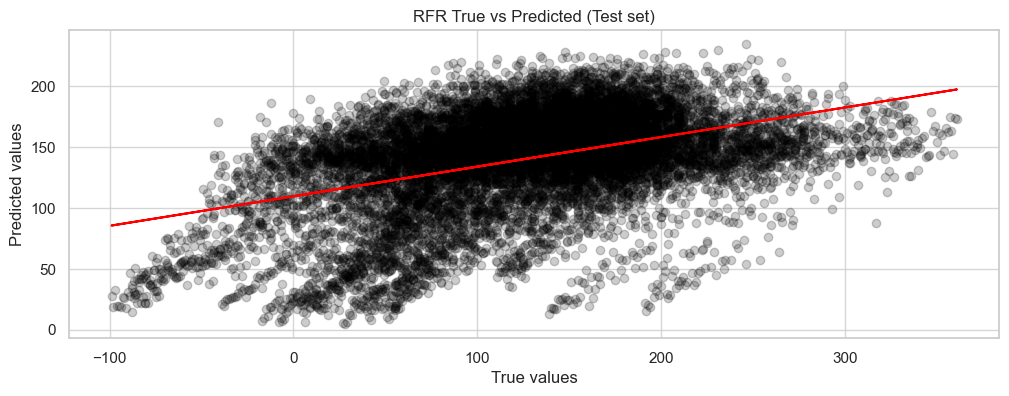

In [278]:
train_eval(rfr_model, "RFR", X_train, X_test, y_train, y_test)

--- RFR Pipeline TRAIN ---
MAE: 10.960115360380009
RMSE: 15.585879767021956
MSE: 242.91964811206438
R2: 0.9487982350805116

--- RFR Pipeline TEST ---
MAE: 53.15041692119732
RMSE: 66.97842028191317
MSE: 4486.108783460598
R2: 0.14050553990496872


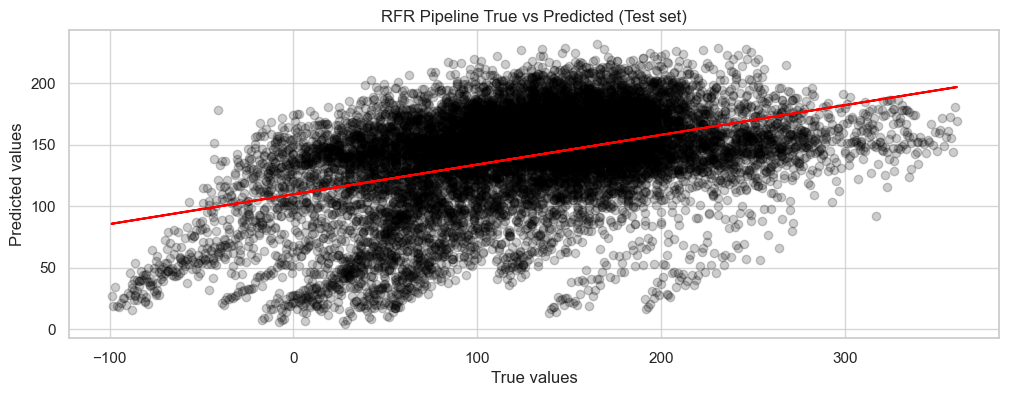

In [279]:
train_eval(rfr_pipeline, "RFR Pipeline", X_train, X_test, y_train, y_test)

### XGB Regressor

--- XGBR TRAIN ---
MAE: 20.259922318758214
RMSE: 28.745282821841226
MSE: 826.2912845076403
R2: 0.8258371949195862

--- XGBR TEST ---
MAE: 54.07119737464477
RMSE: 68.14306278617731
MSE: 4643.477005880904
R2: 0.11035537719726562


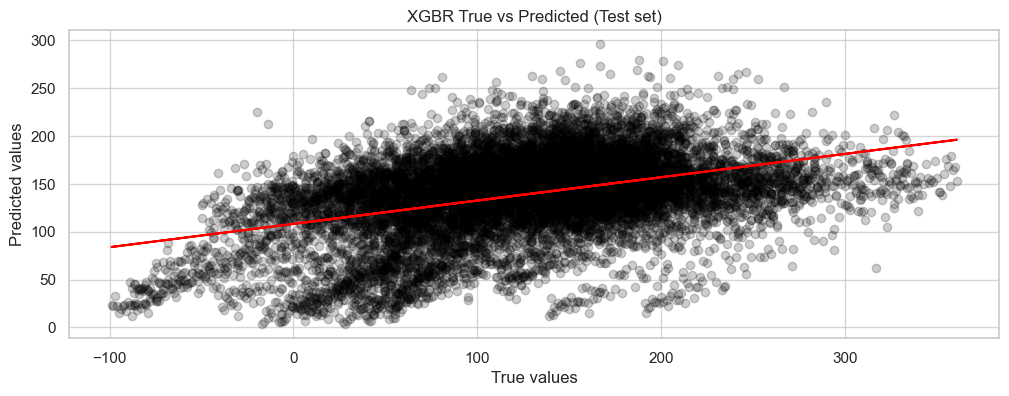

In [280]:
train_eval(xgbr_model, "XGBR", X_train, X_test, y_train, y_test)

--- XGBR Pipeline TRAIN ---
MAE: 20.259922318758214
RMSE: 28.745282821841226
MSE: 826.2912845076403
R2: 0.8258371949195862

--- XGBR Pipeline TEST ---
MAE: 54.06941460372474
RMSE: 68.14157559235062
MSE: 4643.274324208034
R2: 0.1103941798210144


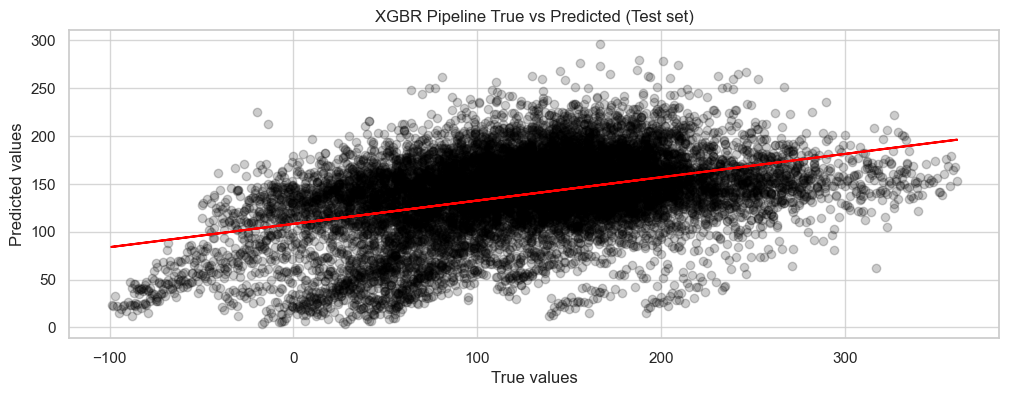

In [281]:
train_eval(xgbr_pipeline, "XGBR Pipeline", X_train, X_test, y_train, y_test)

### KNN Regressor

--- KNNR TRAIN ---
MAE: 28.012931995540693
RMSE: 38.98994833237376
MSE: 1520.2160709611749
R2: 0.6795741040417037

--- KNNR TEST ---
MAE: 55.58036041539402
RMSE: 70.59497447766908
MSE: 4983.650421502749
R2: 0.045181440065829914


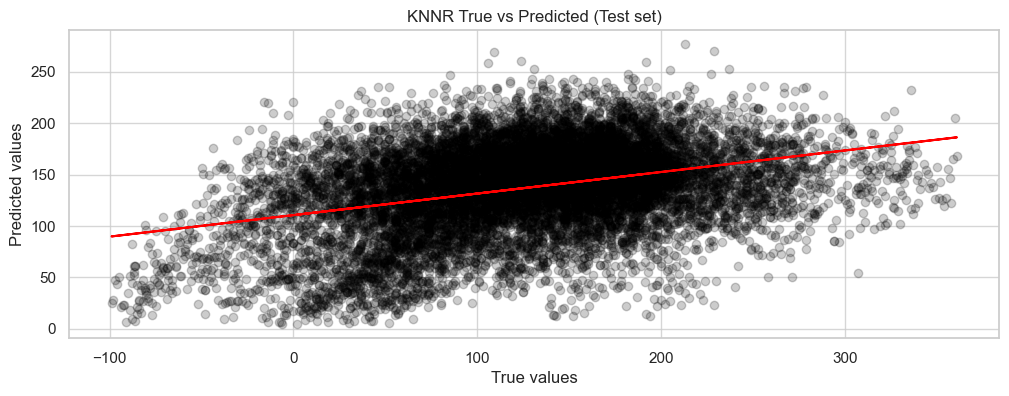

In [282]:
train_eval(knnr_model, "KNNR", X_train, X_test, y_train, y_test)

--- KNNR Pipeline TRAIN ---
MAE: 26.784508748969994
RMSE: 37.634069091915954
MSE: 1416.3231564151035
R2: 0.7014722939523628

--- KNNR Pipeline TEST ---
MAE: 55.0246334758705
RMSE: 69.52886918373875
MSE: 4834.263649969455
R2: 0.07380248087021746


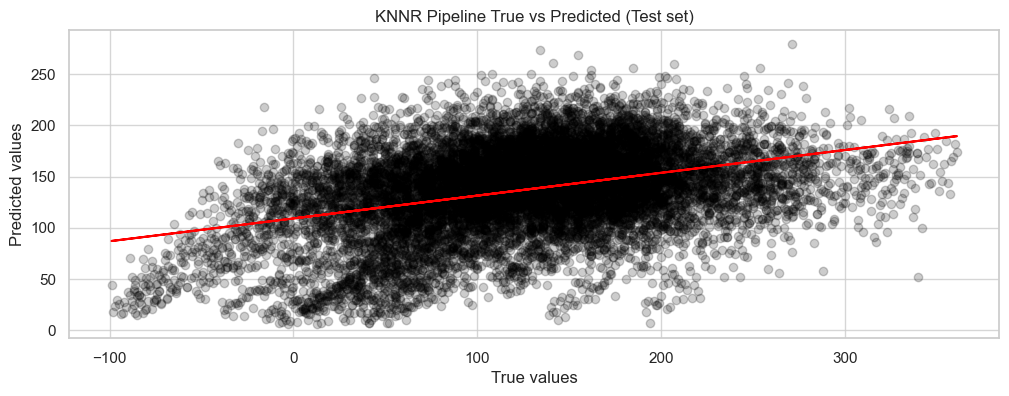

In [283]:
train_eval(knnr_pipeline, "KNNR Pipeline", X_train, X_test, y_train, y_test)

### Ridge Regression

--- Ridge TRAIN ---
MAE: 34.11329290038785
RMSE: 44.668486353296
MSE: 1995.2736730945905
R2: 0.5794431024669366

--- Ridge TEST ---
MAE: 52.3773630739822
RMSE: 66.31281661851912
MSE: 4397.389647881347
R2: 0.15750325645966268


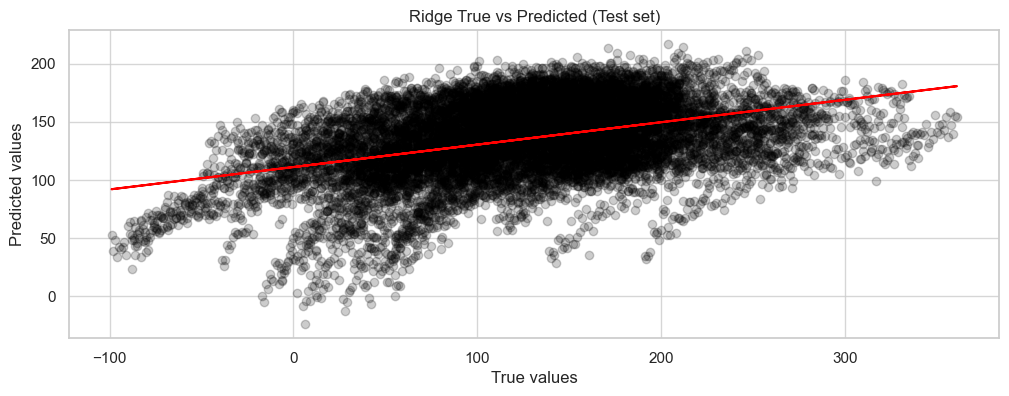

In [284]:
train_eval(ridge_model, "Ridge", X_train, X_test, y_train, y_test)

--- Ridge Pipeline TRAIN ---
MAE: 34.11282440777681
RMSE: 44.668493670452555
MSE: 1995.2743267872597
R2: 0.5794429646838523

--- Ridge Pipeline TEST ---
MAE: 52.376357038012564
RMSE: 66.31233792056084
MSE: 4397.326160490651
R2: 0.1575154200212754


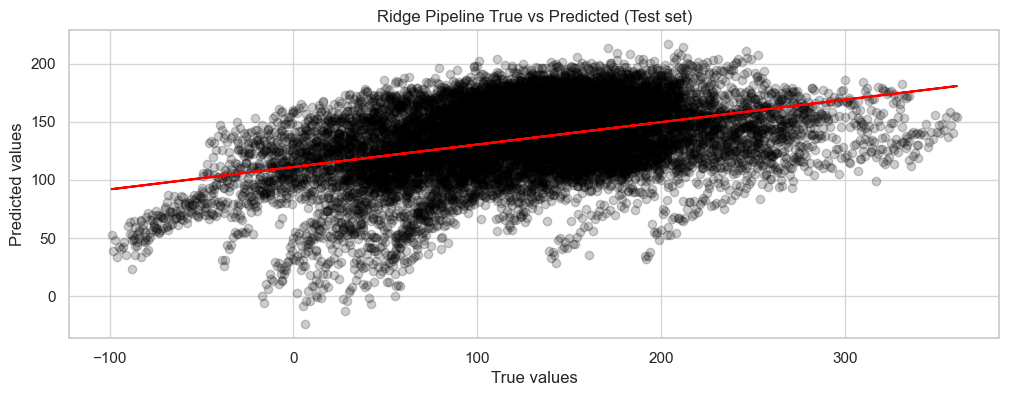

In [285]:
train_eval(ridge_pipeline, "Ridge Pipeline", X_train, X_test, y_train, y_test)

### Lasso Regression

--- Lasso TRAIN ---
MAE: 34.74759511431916
RMSE: 45.387061214220005
MSE: 2059.9853256633537
R2: 0.5658034037100502

--- Lasso TEST ---
MAE: 52.533663615288994
RMSE: 66.53431726029675
MSE: 4426.815373293821
R2: 0.15186557596703998


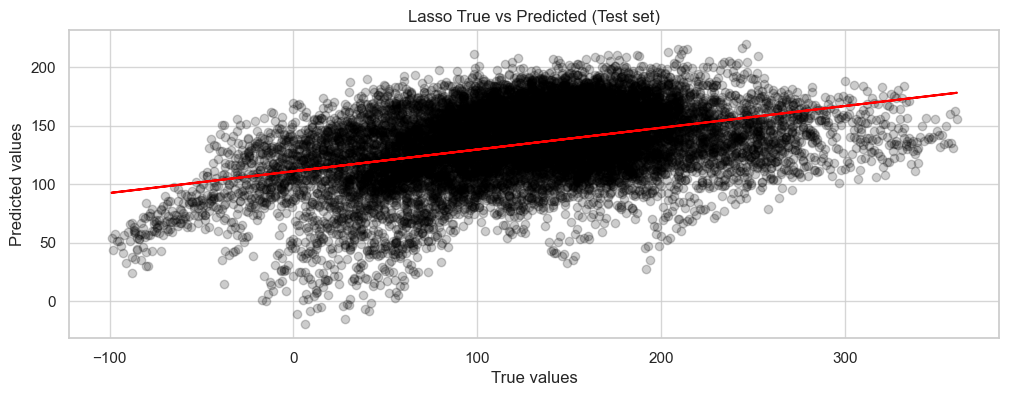

In [286]:
train_eval(lasso_model, "Lasso", X_train, X_test, y_train, y_test)

--- Lasso Pipeline TRAIN ---
MAE: 34.1001424247261
RMSE: 44.69693756993816
MSE: 1997.816228130949
R2: 0.5789071914927596

--- Lasso Pipeline TEST ---
MAE: 52.281173046211045
RMSE: 66.25784413693398
MSE: 4390.101909674237
R2: 0.1588995156495261


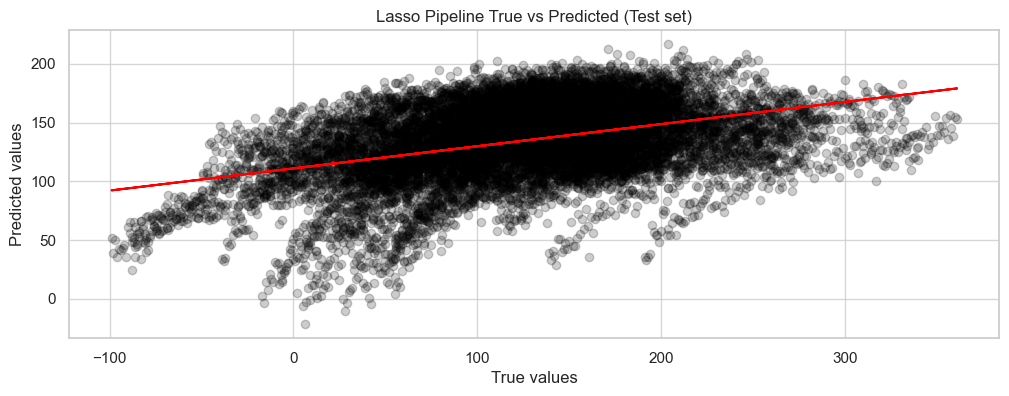

In [287]:
train_eval(lasso_pipeline, "Lasso Pipeline", X_train, X_test, y_train, y_test)

### SV Regressor

--- SVR TRAIN ---
MAE: 56.68737939082032
RMSE: 69.00825330038835
MSE: 4762.139023570559
R2: -0.0037472254459105514

--- SVR TEST ---
MAE: 60.76971382289102
RMSE: 75.72568498558076
MSE: 5734.3793665354115
R2: -0.0986508654875844


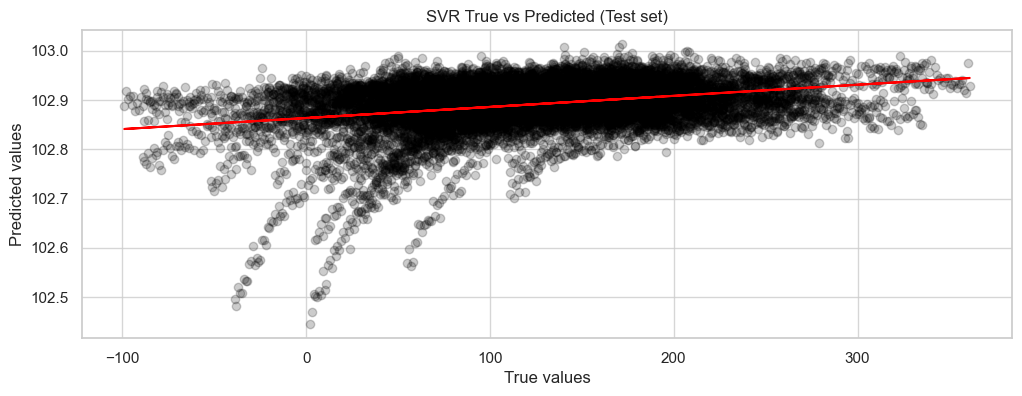

In [288]:
train_eval(svr_model, "SVR", X_train, X_test, y_train, y_test)

--- SVR Pipeline TRAIN ---
MAE: 29.278359196155307
RMSE: 42.20087550531521
MSE: 1780.9138934151133
R2: 0.624625116901103

--- SVR Pipeline TEST ---
MAE: 51.08442180240457
RMSE: 64.84573670595874
MSE: 4204.969568938524
R2: 0.19436905705552499


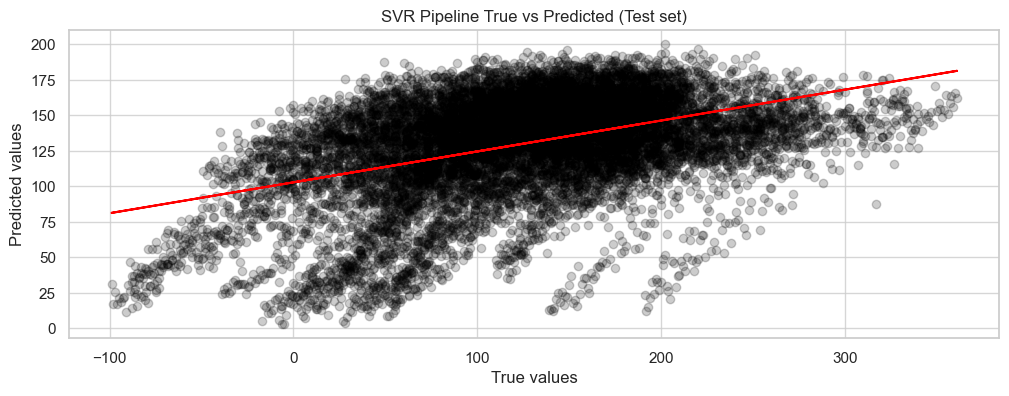

In [289]:
train_eval(svr_pipeline, "SVR Pipeline", X_train, X_test, y_train, y_test)

As a conclusion, we can see that normalizing the data does not improve the model's performance because we are using tree based models such as Random Forest Regressor and XGBoost Regressor. this normalization would be more useful for linear models, as we see in the next section.

We also detect sightly overfitting in both models, hence this is not a big issue, we're gonna treat them later tho.

We can also see that the models have a huge overfitting issue, this is because we are using a lot of features and not enough relevant data. 

## Conclusions

We can clearly see that the linear based models are not the best choice for this problem, not because are bad models but because tree based models are better for this problem; they need to generalize better, need more complexity to understand the data altough they are more complex to train and has very large amount of parameters to tune. We'll keep using tree based models instead of lienar models and trying to improve these metrics with hyperparams and feature engineering.

What we need to do? Since we are lacking of some important data that we can use to predict the RUL, we need to ensure we got some new features that actually helps our models to predict better.

1. Feature Engineering.
2. Hyperparameter Optimization.

We'll be doing that on the next notebook: [03_featureeng_fd001](03_featureeng_fd001.ipynb)